## 1. Load and prepare the dataset

In [ ]:
#!pip install datasets scikit-learn spacy wordcloud matplotlib

In [ ]:
#!python -m spacy download en_core_web_sm

In [5]:
!pip install bert-score



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
!pip install --upgrade transformers
!pip install evaluate
!pip install rouge-score


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 97.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 86.7 MB/s eta 0:00:00:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.2
    Uninstalling tokenizers-0.21.2:
      Successfully uninstalled tokenizers-0.21.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.53.3
    Uninstalling transformers-4.53.3:
      Successfully uninstalled transformers-4.53.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 37.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 19.0.1
    Uninstalling pyarrow-19.0.1:
      Successfully uninstalled pyarrow-19.0.1
ERROR: pip's dependency resolver does not currently take into account a

In [7]:
import re
import spacy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datasets import load_dataset



In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

In [ ]:
print("Loading the 'fiscalnote/billsum' dataset...")
try:
    # Load a small sample of the training split for demonstration purposes
    dataset = load_dataset('FiscalNote/billsum', split='train[:8000]')
    print(f"Dataset loaded. Total examples: {len(dataset)}")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please check your internet connection and ensure the 'datasets' library is installed.")
    exit()


Loading the 'fiscalnote/billsum' dataset...
Dataset loaded. Total examples: 8000


In [ ]:
df = pd.DataFrame(dataset)
df

,text,summary,title
0,SECTION 1. LIABILITY OF BUSINESS ENTITIES PROV...,Shields a business entity from civil liability...,A bill to limit the civil liability of busines...
1,SECTION 1. SHORT TITLE.\n\n This Act may be...,Human Rights Information Act - Requires certai...,Human Rights Information Act
2,SECTION 1. SHORT TITLE.\n\n This Act may be...,Jackie Robinson Commemorative Coin Act - Direc...,Jackie Robinson Commemorative Coin Act
3,SECTION 1. NONRECOGNITION OF GAIN WHERE ROLLOV...,Amends the Internal Revenue Code to provide (t...,To amend the Internal Revenue Code to provide ...
4,SECTION 1. SHORT TITLE.\n\n This Act may be...,Native American Energy Act - (Sec. 3) Amends t...,Native American Energy Act
...,...,...,...
7995,SECTION 1. CREDIT FOR EMPLOYER COSTS OF PROVID...,Amends the Internal Revenue Code to allow an e...,To amend the Internal Revenue Code of 1986 to ...
7996,SECTION 1. FINDINGS.\n\n The Congress finds...,Authorizes appropriations to the Secretary of ...,To authorize the Secretary of the Interior to ...
7997,SECTION 1. SHORT TITLE.\n\n This Act may be...,Wall Street Accountability through Sustainable...,To require the Commodity Futures Trading Commi...
7998,SECTION 1. SHORT TITLE.\n\n This Act may be...,Federal Election Law Reform Commission Act - E...,Federal Election Law Reform Commission Act


In [ ]:
full_texts = [doc['text'] for doc in dataset]  # Inputs: full bill texts
summaries = [doc['summary'] for doc in dataset]  # Outputs: summaries

In [ ]:
def preprocess_text(text):
    """Simple text preprocessing: lowercase, remove non-alphanumeric chars."""
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

# Clean full texts and summaries separately
cleaned_full_texts = [clean_text(text) for text in full_texts]
cleaned_summaries = [clean_text(summary) for summary in summaries]

# Optional: Apply POS filtering to full texts for better focus (reuse your function)
pos_filtered_full_texts = [filter_pos(doc) for doc in cleaned_full_texts]
# Use pos_filtered_full_texts as inputs if you want; otherwise, stick with cleaned_full_texts


--- Preprocessing complete. ---



## 2. Part-of-Speech (POS) Filtering

In [ ]:
try:
    # Load the spaCy model. If this fails, run the download command from the intro comments.
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("spaCy model 'en_core_web_sm' not found. Please download it by running:")
    print("python -m spacy download en_core_web_sm")
    exit()

In [ ]:
def filter_pos(text):
    """Filters a document to keep only nouns and verbs."""
    doc = nlp(text)
    filtered_tokens = [
        token.lemma_ for token in doc
        if token.pos_ in ['NOUN', 'VERB'] and not token.is_stop and not token.is_punct
    ]
    return " ".join(filtered_tokens)

In [ ]:
pos_filtered_documents = [filter_pos(doc) for doc in processed_documents]
print("POS filtering complete. Here is a sample:")
print("Original:", documents[0][:150], "...")
print("Filtered:", pos_filtered_documents[0][:150], "...")
print("-" * 50)

POS filtering complete. Here is a sample:
Original: Shields a business entity from civil liability relating to any injury or death occurring at a facility of that entity in connection with a use of such ...
Filtered: shield business entity liability relate injury death occur facility entity connection use facility organization use occur scope business business enti ...
--------------------------------------------------


## 3. TF-IDF Analysis





In [ ]:
# Instead of removing stop words, this naturally downweights common words.
# We use the POS-filtered documents to focus on more meaningful terms
vectorizer = TfidfVectorizer(max_features=1000, stop_words=None)
tfidf_matrix = vectorizer.fit_transform(pos_filtered_documents)
feature_names = vectorizer.get_feature_names_out()

In [ ]:
# Function to get top TF-IDF terms for a document
def get_top_tfidf_terms(document_index, top_n=10):
    """Finds the most important terms for a specific document."""
    feature_index = tfidf_matrix[document_index, :].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[document_index, x] for x in feature_index])
    sorted_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

    print(f"\nTop {top_n} TF-IDF terms for document {document_index}:")
    for i in range(top_n):
        idx, score = sorted_scores[i]
        print(f"  {feature_names[idx]:<20} (score: {score:.4f})")

get_top_tfidf_terms(document_index=15)


Top 10 TF-IDF terms for document 15:
  library              (score: 0.4816)
  computer             (score: 0.4292)
  school               (score: 0.3141)
  donation             (score: 0.3046)
  deduction            (score: 0.2495)
  percent              (score: 0.2093)
  credit               (score: 0.1849)
  tax                  (score: 0.1747)
  increase             (score: 0.1630)
  enterprise           (score: 0.1493)


## 4. Topic Modeling (LDA)

In [ ]:
# Identifies underlying themes in the corpus.
n_topics = 5
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(tfidf_matrix)

def display_topics(model, feature_names, no_top_words):
    """Prints the top words for each discovered topic."""
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
no_top_words = 10
display_topics(lda_model, feature_names, no_top_words)

Topic #1:
act person state require law information action prohibit court agency
Topic #2:
tax credit revenue code income loan business amend allow taxpayer
Topic #3:
program grant secretary state act project authorize require research establish
Topic #4:
land coin secretary tribe park area forest wilderness lease property
Topic #5:
health service care program act veteran child provide individual drug


## 5. Visualization (Word Cloud)

In [ ]:
# A visual representation of a topic's most important words.
# Create a dictionary of word frequencies for the first topic
topic_weights = lda_model.components_[0]
word_weights_dict = {feature_names[i]: topic_weights[i] for i in range(len(feature_names))}

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(word_weights_dict)

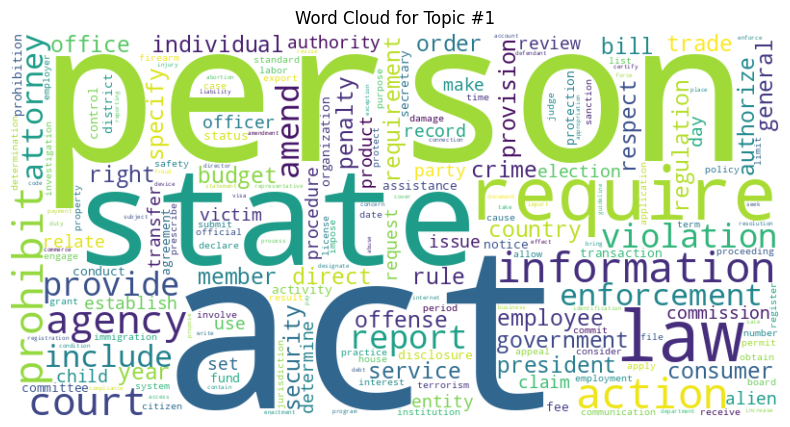

In [ ]:
# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Topic #1")
plt.axis('off')
plt.show()


# Task
Implement the suggested NLP tasks (text cleaning, normalization, length analysis, NER, dependency parsing, collocation extraction, and readability scores) on the legal bill dataset.

## Implement text cleaning and normalization

### Subtask:
Create functions to remove headers, footers, metadata, handle punctuation and special characters, and remove duplicate summaries. Apply these to the dataset.


**Reasoning**:
Define the text cleaning and duplicate removal functions and apply them to the documents.



In [ ]:
def clean_text(text):
    """Simple text cleaning: lowercase, remove non-alphanumeric, strip whitespace."""
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = text.strip()
    return text

def remove_duplicates(documents):
    """Removes duplicate strings from a list."""
    seen = set()
    unique_docs = []
    for doc in documents:
        if doc not in seen:
            seen.add(doc)
            unique_docs.append(doc)
    return unique_docs

# Apply cleaning
cleaned_documents = [clean_text(doc) for doc in documents]
print(f"Number of documents after cleaning: {len(cleaned_documents)}")

# Apply duplicate removal
unique_documents = remove_duplicates(cleaned_documents)
print(f"Number of documents after removing duplicates: {len(unique_documents)}")

# Display the first unique document as a sample
print("\n--- Sample of a unique document: ---\n")
print(unique_documents[0][:200], "...")
print("-" * 50)

Number of documents after cleaning: 8000
Number of documents after removing duplicates: 7998

--- Sample of a unique document: ---

shields a business entity from civil liability relating to any injury or death occurring at a facility of that entity in connection with a use of such facility by a nonprofit organization if 1 the use ...
--------------------------------------------------


### Subtask:
Implement Named Entity Recognition (NER) on the processed documents.

In [ ]:
# Ensure the spaCy model is loaded
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("spaCy model 'en_core_web_sm' not found. Please download it by running:")
    print("python -m spacy download en_core_web_sm")
    exit()

def perform_ner(text):
    """Performs NER on the input text and returns a list of entities."""
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER to the unique documents
# Using unique_documents from the previous cleaning step
ner_results = [perform_ner(doc) for doc in unique_documents]

print("\n--- NER Results Sample (first document): ---\n")
for text, label in ner_results[0]:
    print(f"  Entity: {text:<30} | Type: {label:<15}")
print("-" * 50)

# You might want to store these entities or analyze their frequencies later
# For example, counting the occurrences of different entity types:
entity_type_counts = {}
for doc_entities in ner_results:
    for text, label in doc_entities:
        entity_type_counts[label] = entity_type_counts.get(label, 0) + 1

print("\n--- Entity Type Counts: ---\n")
for entity_type, count in entity_type_counts.items():
    print(f"  {entity_type:<20}: {count}")
print("-" * 50)


--- NER Results Sample (first document): ---

  Entity: 1                              | Type: CARDINAL       
  Entity: 2                              | Type: CARDINAL       
  Entity: 3                              | Type: CARDINAL       
  Entity: 1                              | Type: CARDINAL       
  Entity: 2                              | Type: CARDINAL       
--------------------------------------------------

--- Entity Type Counts: ---

  CARDINAL            : 29161
  GPE                 : 6775
  DATE                : 16190
  ORG                 : 11837
  NORP                : 2241
  PERSON              : 735
  ORDINAL             : 713
  TIME                : 611
  LOC                 : 343
  LAW                 : 238
  FAC                 : 118
  PERCENT             : 690
  QUANTITY            : 343
  LANGUAGE            : 80
  MONEY               : 196
  EVENT               : 88
  PRODUCT             : 228
  WORK_OF_ART         : 8
---------------------------------------

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Download necessary NLTK data (if not already downloaded)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
     nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab') # Check for punkt_tab
except LookupError:
     nltk.download('punkt_tab') # Download punkt_tab if missing


# Combine all processed documents into a single string for collocation analysis
all_text = " ".join(pos_filtered_documents) # Using POS-filtered documents to focus on key terms

# Tokenize the text
tokens = nltk.word_tokenize(all_text)

# Remove standard English stop words (optional, depending on desired collocations)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Find bigram collocations
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(filtered_tokens)

# You can use different scoring methods (e.g., pmi, likelihood_ratio)
# Using PMI (Pointwise Mutual Information) to find words that co-occur more often than expected by chance
# Filter out bigrams that appear less than N times to reduce noise
min_freq = 5 # Adjust minimum frequency as needed
finder.apply_freq_filter(min_freq)

print(f"\n--- Top 20 Bigram Collocations (PMI, min frequency {min_freq}) ---\n")
top_bigrams = finder.nbest(bigram_measures.pmi, 20)

for bigram in top_bigrams:
    print(bigram)

print("-" * 50)

# You could also explore TrigramCollocationFinder for three-word phrases


--- Top 20 Bigram Collocations (PMI, min frequency 5) ---

('curio', 'relic')
('shot', 'reloading')
('burying', 'beetle')
('coup', 'detat')
('extremity', 'amputation')
('interment', 'memorialization')
('inventorie', 'roadless')
('irgcs', 'qod')
('screenwriter', 'cinematographer')
('denatonium', 'benzoate')
('fraternity', 'sorority')
('digitaltoanalog', 'converter')
('methyl', 'bromide')
('rehabilitating', 'publiclyowne')
('valle', 'caldera')
('coolant', 'antifreeze')
('devil', 'staircase')
('leadbase', 'paint')
('chlorine', 'soda')
('retardation', 'cooccurre')
--------------------------------------------------


### Subtask:
Calculate Readability Scores (Flesch-Kincaid, Gunning Fog).

In [ ]:
!pip install textstat

In [ ]:
import textstat

# Calculate readability scores for cleaned documents
document_flesch_kincaid = [textstat.flesch_kincaid_grade(doc) for doc in cleaned_documents]
document_gunning_fog = [textstat.gunning_fog(doc) for doc in cleaned_documents]

# Calculate readability scores for original summaries
summary_flesch_kincaid = [textstat.flesch_kincaid_grade(summary) for summary in documents]
summary_gunning_fog = [textstat.gunning_fog(summary) for summary in documents]

print("\n--- Readability Scores ---\n")
print(f"Average Document Flesch-Kincaid Grade: {np.mean(document_flesch_kincaid):.2f}")
print(f"Average Document Gunning Fog Score: {np.mean(document_gunning_fog):.2f}")
print(f"\nAverage Summary Flesch-Kincaid Grade: {np.mean(summary_flesch_kincaid):.2f}")
print(f"Average Summary Gunning Fog Score: {np.mean(summary_gunning_fog):.2f}")
print("-" * 50)

# You could also visualize the distributions of these scores


--- Readability Scores ---

Average Document Flesch-Kincaid Grade: 77.03
Average Document Gunning Fog Score: 82.68

Average Summary Flesch-Kincaid Grade: 22.66
Average Summary Gunning Fog Score: 26.92
--------------------------------------------------


### Subtask:
Implement Collocation Extraction to identify multi-word legal phrases.

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Download necessary NLTK data (if not already downloaded)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
     nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab') # Check for punkt_tab
except LookupError:
     nltk.download('punkt_tab') # Download punkt_tab if missing


# Combine all processed documents into a single string for collocation analysis
all_text = " ".join(pos_filtered_documents) # Using POS-filtered documents to focus on key terms

# Tokenize the text
tokens = nltk.word_tokenize(all_text)

# Remove standard English stop words (optional, depending on desired collocations)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Find bigram collocations
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(filtered_tokens)

# You can use different scoring methods (e.g., pmi, likelihood_ratio)
# Using PMI (Pointwise Mutual Information) to find words that co-occur more often than expected by chance
# Filter out bigrams that appear less than N times to reduce noise
min_freq = 5 # Adjust minimum frequency as needed
finder.apply_freq_filter(min_freq)

print(f"\n--- Top 20 Bigram Collocations (PMI, min frequency {min_freq}) ---\n")
top_bigrams = finder.nbest(bigram_measures.pmi, 20)

for bigram in top_bigrams:
    print(bigram)

print("-" * 50)

# You could also explore TrigramCollocationFinder for three-word phrases


--- Top 20 Bigram Collocations (PMI, min frequency 5) ---

('curio', 'relic')
('shot', 'reloading')
('burying', 'beetle')
('coup', 'detat')
('extremity', 'amputation')
('interment', 'memorialization')
('inventorie', 'roadless')
('irgcs', 'qod')
('screenwriter', 'cinematographer')
('denatonium', 'benzoate')
('fraternity', 'sorority')
('digitaltoanalog', 'converter')
('methyl', 'bromide')
('rehabilitating', 'publiclyowne')
('valle', 'caldera')
('coolant', 'antifreeze')
('devil', 'staircase')
('leadbase', 'paint')
('chlorine', 'soda')
('retardation', 'cooccurre')
--------------------------------------------------


### Subtask:
Implement Dependency Parsing (Optional) on a sample document.

In [ ]:
# Ensure the spaCy model is loaded
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("spaCy model 'en_core_web_sm' not found. Please download it by running:")
    print("python -m spacy download en_core_web_sm")
    exit()

# Use the first unique document as a sample for dependency parsing
sample_document = unique_documents[0]

print("\n--- Performing Dependency Parsing on a Sample Document ---\n")
doc = nlp(sample_document)

# We'll analyze the first sentence for clarity.
if doc.sents:
    first_sentence = list(doc.sents)[0]
    print(f"Sample Sentence: {first_sentence.text}")
    print("\nDependency relationships:")
    for token in first_sentence:
        print(f"  {token.text:<15} <-- {token.dep_:<15} -- {token.head.text:<15}")

    # Visualize the dependency parse
    print("\n--- Visualization of Dependency Parse ---")
    print("Generating a visual diagram of the first sentence's dependency tree.")
    from spacy import displacy
    from IPython.display import HTML, display
    html = displacy.render(first_sentence, style="dep", page=True)
    display(HTML(html))
else:
    print("No sentences found in the sample document.")

print("-" * 50)


--- Performing Dependency Parsing on a Sample Document ---

Sample Sentence: shields a business entity from civil liability relating to any injury or death occurring at a facility of that entity in connection with a use of such facility by a nonprofit organization if 1 the use occurs outside the scope of business of the business entity 2 such injury or death occurs during a period that such facility is used by such organization and 3 the business entity authorized the use of such facility by the organization 
makes this act inapplicable to an injury or death that results from an act or omission of a business entity that constitutes gross negligence or intentional misconduct including misconduct that 1 constitutes a hate crime or a crime of violence or act of international terrorism for which the defendant has been convicted in any court or 2 involves a sexual offense for which the defendant has been convicted in any court or misconduct for which the defendant has been found to have vi

<IPython.core.display.HTML object>

--------------------------------------------------


### Subtask:
Implement Tokenization and Title Augmentation.

In [ ]:
from transformers import AutoTokenizer

# Choose a tokenizer appropriate for your chosen model (e.g., 'bart-base', 'bert-base-uncased', 't5-small')
# For demonstration, let's use a BART tokenizer.
# If you plan to use Legal-BERT or T5, replace 'bart-base' with the appropriate model name.
model_checkpoint = "facebook/bart-base" # Replace with your chosen model checkpoint
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

# Define max input length for the tokenizer (adjust based on your model and analysis)
# BART base has a max length of 1024
max_input_length = 1024
max_summary_length = 128 # Adjust based on desired summary length

def tokenize_function(examples):
    """Tokenizes the documents and summaries."""
    # Handle potential long documents by truncation
    model_inputs = tokenizer(
        examples['summary'], max_length=max_input_length, truncation=True
    )
    # Tokenize summaries (labels) separately
    labels = tokenizer(
        examples['summary'], max_length=max_summary_length, truncation=True
    )
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# The 'dataset' variable should contain your loaded dataset from earlier steps
# Apply the tokenization function to your dataset
# You might need to adapt this based on the structure of your 'dataset' object
# If your dataset is a list of strings, you'll need to process it differently.
# Assuming 'dataset' is a Hugging Face dataset object:
try:
    tokenized_datasets = dataset.map(tokenize_function, batched=True)
    print("\n--- Tokenization complete. ---\n")
    print(tokenized_datasets)
except AttributeError:
    print("\n--- Cannot apply map directly. Assuming 'documents' is a list of strings. ---")
    print("Tokenizing documents and summaries as lists...")

    # If 'dataset' is not a Hugging Face dataset object, process the lists directly
    # Assuming 'documents' is a list of original summaries and 'cleaned_documents' are cleaned.
    # We'll tokenize the cleaned documents as input and original summaries as labels.
    tokenized_inputs = tokenizer(
        cleaned_documents, max_length=max_input_length, truncation=True, padding="max_length"
    )
    tokenized_labels = tokenizer(
        documents, max_length=max_summary_length, truncation=True, padding="max_length"
    )

    # Create a simple dictionary structure similar to Hugging Face datasets
    tokenized_data = {
        "input_ids": tokenized_inputs["input_ids"],
        "attention_mask": tokenized_inputs["attention_mask"],
        "labels": tokenized_labels["input_ids"]
    }
    print("Tokenization complete for lists.")
    # print("\n--- Sample Tokenized Input (first document): ---\n")
    # print(tokenized_data['input_ids'][0][:100]) # Print first 100 tokens
    # print("\n--- Sample Tokenized Label (first summary): ---\n")
    # print(tokenized_data['labels'][0][:100]) # Print first 100 tokens


# --- Title Augmentation ---

# Assuming you have a list of titles corresponding to your documents
# If your dataset object includes titles, you would access them here.
# For this example, let's assume you have a list called 'titles'
# If your dataset is from Hugging Face, you'd access examples['title']

# Simple Title Augmentation: Prepend the title to the document
def augment_with_title(examples, titles):
    """Prepends the title to the document text."""
    augmented_inputs = [f"{titles[i]} {examples['summary'][i]}" for i in range(len(examples['summary']))]
    # You would then re-tokenize this augmented text
    # For simplicity here, we just show the augmented text
    return augmented_inputs

# Example usage (assuming 'dataset' has a 'title' and 'summary' column):
try:
    if 'title' in dataset.column_names:
        augmented_summaries = augment_with_title(dataset, dataset['title'])
        print("\n--- Sample Augmented Summary (first document): ---\n")
        print(augmented_summaries[0][:200], "...")
        # You would then tokenize augmented_summaries
except AttributeError:
     print("\n--- Cannot access dataset columns directly for augmentation. ---")
     print("Title augmentation requires access to document titles.")
     # If you have a separate list of titles and cleaned_documents:
     # augmented_documents = [f"{titles[i]} {cleaned_documents[i]}" for i in range(len(cleaned_documents))]
     # print("\n--- Sample Augmented Document (first document): ---\n")
     # print(augmented_documents[0][:200], "...")


# print("\n--- Title Augmentation conceptual example provided. ---")
# print("You will need to integrate this with your actual data structure containing titles.")
# print("After augmentation, you would re-tokenize the augmented text.")

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]


--- Tokenization complete. ---

Dataset({
    features: ['text', 'summary', 'title', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 8000
})

--- Sample Augmented Summary (first document): ---

A bill to limit the civil liability of business entities providing use of facilities to nonprofit organizations. Shields a business entity from civil liability relating to any injury or death occurrin ...


### Subtask:
Prepare Data for LSTM: Tokenize and convert text to numerical sequences.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Assuming 'cleaned_documents' contains your preprocessed legal bill texts
# Assuming 'documents' contains your original summaries (as labels)

# Configure tokenizer for input documents
# Adjust num_words based on your vocabulary size needs
tokenizer_inputs = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer_inputs.fit_on_texts(cleaned_documents)

# Configure tokenizer for output summaries
tokenizer_outputs = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer_outputs.fit_on_texts(documents)

# Convert text to sequences
input_sequences = tokenizer_inputs.texts_to_sequences(cleaned_documents)
output_sequences = tokenizer_outputs.texts_to_sequences(documents)

# Determine maximum sequence lengths
max_input_len = max([len(seq) for seq in input_sequences])
max_output_len = max([len(seq) for seq in output_sequences])

print(f"Maximum input sequence length: {max_input_len}")
print(f"Maximum output sequence length: {max_output_len}")

# Pad sequences to ensure uniform length for the model
# Use 'post' padding for input sequences and 'post' padding for output sequences (common for Seq2Seq)
padded_input_sequences = pad_sequences(input_sequences, maxlen=max_input_len, padding='post', truncating='post')
padded_output_sequences = pad_sequences(output_sequences, maxlen=max_output_len, padding='post', truncating='post')

print("\n--- Sample of padded input sequence (first document): ---\n")
print(padded_input_sequences[0][:50], "...") # Print first 50 elements
print("\n--- Sample of padded output sequence (first summary): ---\n")
print(padded_output_sequences[0][:50], "...") # Print first 50 elements

# You now have numerical data ready for an LSTM model
# padded_input_sequences as your model inputs
# padded_output_sequences as your model labels (target sequences)

Maximum input sequence length: 739
Maximum output sequence length: 751

--- Sample of padded input sequence (first document): ---

[2381    6  101  149   22  157  260  222    4   19  400    8  976 1587
   51    6  261    3   11  149    9  631   13    6   48    3   12  261
   15    6  473  286   58   14    2   48 2763  842    2  795    3  101
    3    2  101  149   17   12  400    8] ...

--- Sample of padded output sequence (first summary): ---

[2410    6  105  144   23  160  269  229    4   19  416    8 1005 1616
   51    6  270    3   11  144    9  590   14    6   47    3   12  270
   15    6  492  276   61   13    2   47 2798  873    2  818    3  105
    3    2  105  144   17   12  416    8] ...


### Subtask:
Define LSTM Model Architecture: Build a Seq2Seq model with LSTMs and potentially attention.

## **Seq to Seq LSTM**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 7.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=48d7b1437b38b77428c3f2080fb0ce5e974e39d5b460ecf81dad2df36993b5b7
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
2025-10-26 15:10:48.341109: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761491448.550379      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761491448.618072      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading BillSum ca_test dataset...


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/billsum/incomplete.G3I74U_3.0.0/billsum-train.tfrecord*...:   0%|         …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/billsum/incomplete.G3I74U_3.0.0/billsum-test.tfrecord*...:   0%|          …

Generating ca_test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/billsum/incomplete.G3I74U_3.0.0/billsum-ca_test.tfrecord*...:   0%|       …

Dataset billsum downloaded and prepared to /root/tensorflow_datasets/billsum/3.0.0. Subsequent calls will reuse this data.


I0000 00:00:1761491476.235035      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761491476.235693      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Original dataset shape: (1237, 2)
train_df shape:  (1113, 2)
test_df shape:  (124, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     1113 non-null   object
 1   summary  1113 non-null   object
dtypes: object(2)
memory usage: 17.5+ KB
Duplicates in Dataset:  1
         Total No. of Missing Values  % of Missing Values
text                               0                  0.0
summary                            0                  0.0
        count unique                                                top freq
text     1113   1112  The people of the State of California do enact...    2
summary  1113   1109  Existing law authorizes the Treasurer or chief...    2

Preprocessing: Converting to lowercase...
Preprocessing: Removing special characters...
Preprocessing: Removing URLs...
Preprocessing: Removing emojis...
Preprocessing: Expanding contract

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 512)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 512, 128)  │  3,506,176 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 128, 128)  │  3,506,176 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 512,      │    131,584 │ embedding[0][0]   │
│                     │ 128), (None,      │            │                   │
│                     │ 128), (None,      │            │                   │
│                     │ 128)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 128,      │    131,584 │ embedding_1[0][0… │
│                     │ 128), (None,      │            │ lstm[0][1],       │
│                     │ 128), (None,      │            │ lstm[0][2]        │
│                     │ 128)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 128, 128)  │          0 │ lstm_1[0][0],     │
│ (Attention)         │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128, 256)  │          0 │ lstm_1[0][0],     │
│ (Concatenate)       │                   │            │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast (Cast)         │ (None, 128, 256)  │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128,       │  7,039,744 │ cast[0][0]        │
│                     │ 27392)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,315,264 (54.61 MB)

 Trainable params: 14,315,264 (54.61 MB)

 Non-trainable params: 0 (0.00 B)


Starting training...
Epoch 1/5


I0000 00:00:1761491486.787182     134 cuda_dnn.cc:529] Loaded cuDNN version 90300


279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0869 - loss: 7.0993
Epoch 1: val_loss improved from inf to 4.92370, saving model to model_checkpoint.keras
279/279 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.0870 - loss: 7.0953 - val_accuracy: 0.1956 - val_loss: 4.9237 - learning_rate: 0.0010
Epoch 2/5
278/279 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3189 - loss: 4.4775
Epoch 2: val_loss improved from 4.92370 to 3.79380, saving model to model_checkpoint.keras
279/279 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.3194 - loss: 4.4755 - val_accuracy: 0.4575 - val_loss: 3.7938 - learning_rate: 0.0010
Epoch 3/5
278/279 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4967 - loss: 3.4682
Epoch 3: val_loss improved from 3.79380 to 3.06029, saving model to model_checkpoint.keras
279/279 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.4969 - loss: 3.4669 - val_accuracy: 0.5764 - val_loss: 3.0603 - learning_rate: 0.0010
Epoch 4/5
278/279 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - 

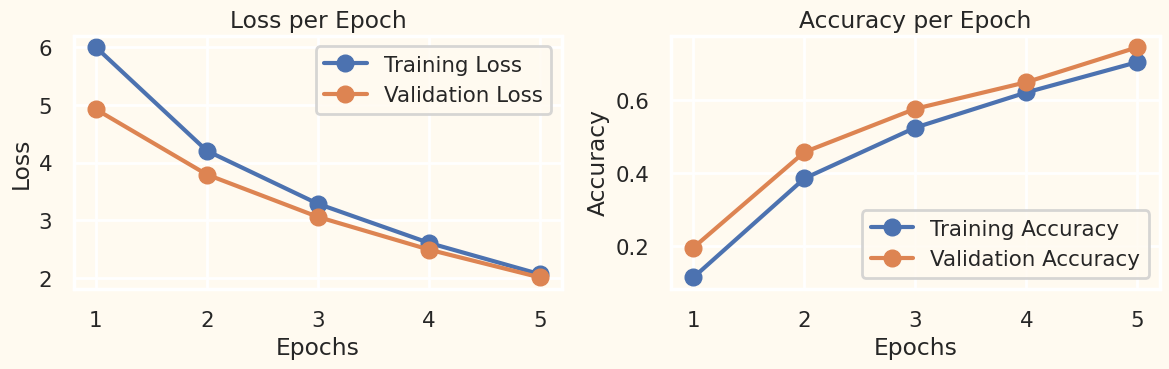


GENERATING PREDICTIONS ON TEST SET
Processed 0/124 samples...
Processed 20/124 samples...
Processed 40/124 samples...
Processed 60/124 samples...
Processed 80/124 samples...
Processed 100/124 samples...
Processed 120/124 samples...

Total predictions generated: 124

CALCULATING BLEU SCORES
BLEU-1: 0.7387
BLEU-2: 0.6363
BLEU-3: 0.5550
BLEU-4: 0.4815

CALCULATING ROUGE SCORES

ROUGE-1:
  Precision: 0.7428
  Recall:    0.7422
  F1-Score:  0.7425

ROUGE-2:
  Precision: 0.5504
  Recall:    0.5500
  F1-Score:  0.5502

ROUGE-L:
  Precision: 0.7401
  Recall:    0.7394
  F1-Score:  0.7398

CALCULATING METEOR SCORES
METEOR (Average): 0.7307

LENGTH STATISTICS

Generated Summaries:
  Average length: 124.51 words
  Min length: 52 words
  Max length: 130 words
  Std deviation: 10.77 words

Reference Summaries:
  Average length: 124.64 words
  Min length: 52 words
  Max length: 129 words
  Std deviation: 10.79 words

SUMMARY OF ALL METRICS
BLEU-1              : 0.7387
BLEU-2              : 0.6363
B

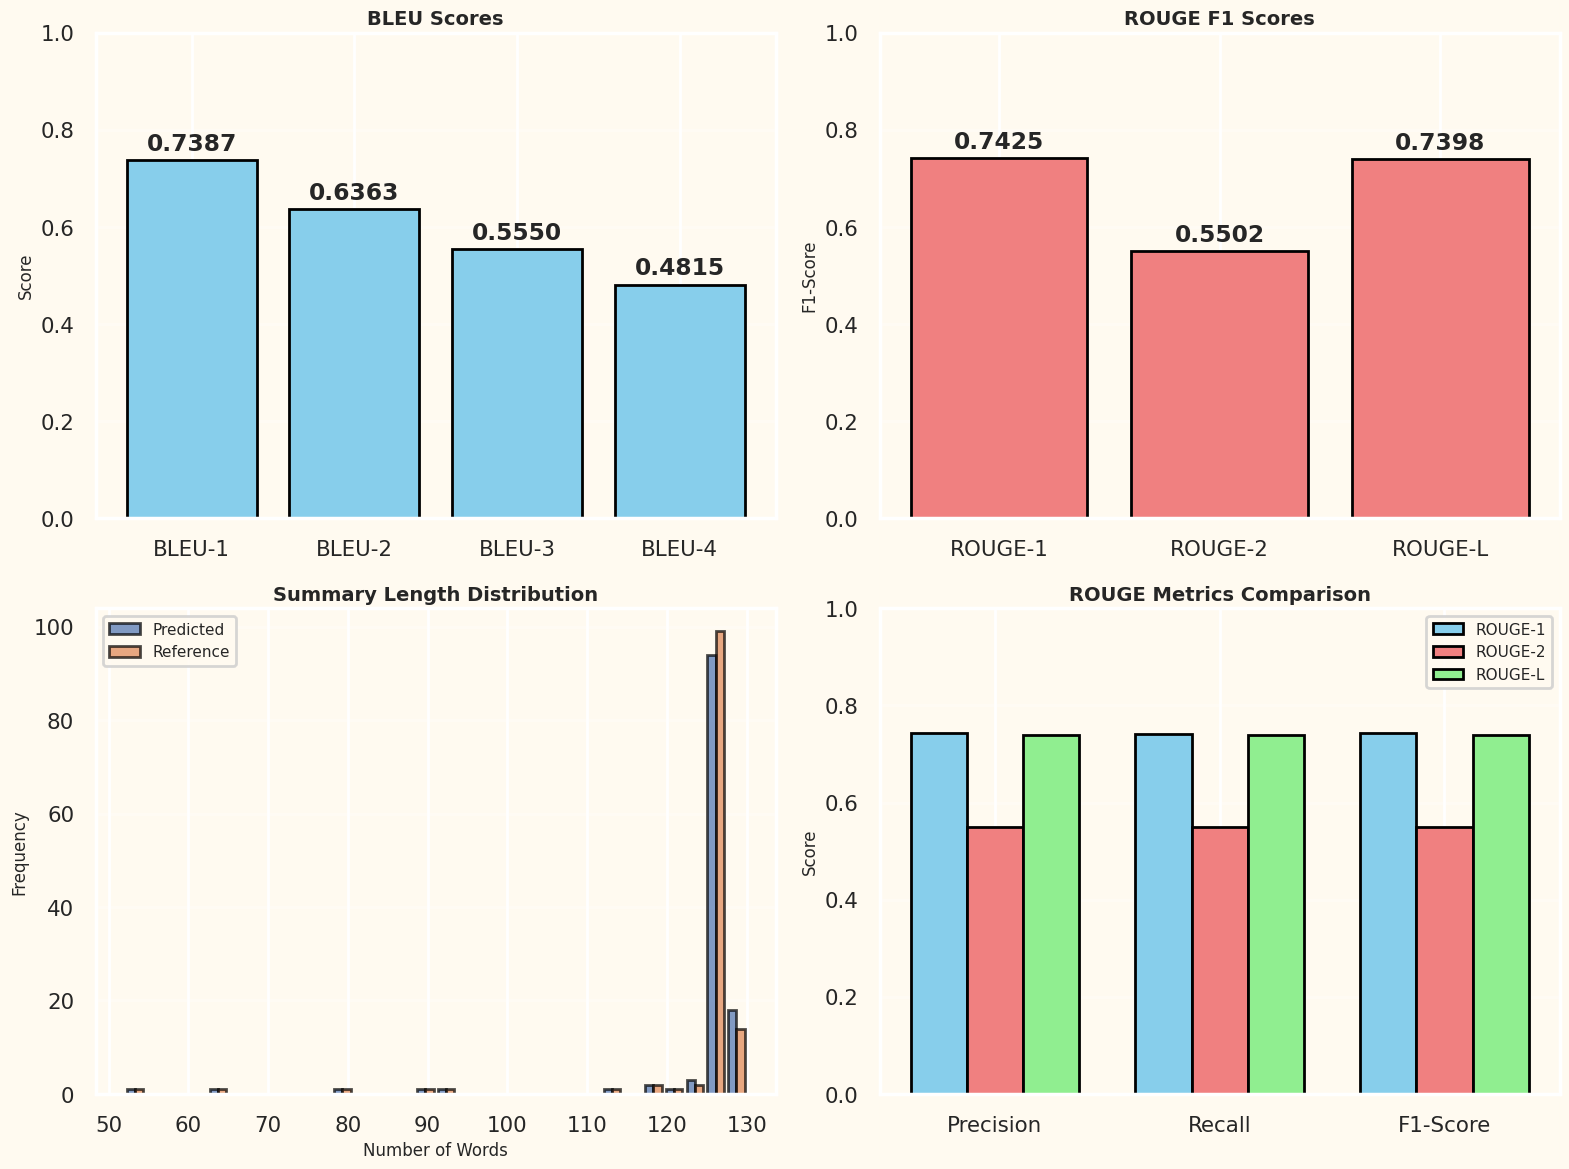

✓ Visualization saved to 'evaluation_metrics_visualization.png'

TRAINING AND EVALUATION COMPLETED SUCCESSFULLY!

Key Results:
  • BLEU-4: 0.4815
  • ROUGE-1 F1: 0.7425
  • ROUGE-2 F1: 0.5502
  • ROUGE-L F1: 0.7398
  • METEOR: 0.7307



In [1]:
!pip install contractions
!pip install pydot
!pip install rouge-score
from textblob import Word
import nltk
nltk.data.path.append("/kaggle/working/")
nltk.download('wordnet')
nltk.download('omw-1.4')

# Library for Data Manipulation
import numpy as np
import pandas as pd
# Library for Data Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)
# Library for preprocessing 
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import math
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Parallel, delayed
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from scipy.sparse import lil_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import pos_tag
# Library for model building
from tensorflow.keras.regularizers import l2
import tensorflow
import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential,Model
from keras.layers import SimpleRNN,LSTM,GRU, Embedding, Dense, SpatialDropout1D, Dropout, BatchNormalization, Bidirectional, Attention, Input, Concatenate
from sklearn.metrics import accuracy_score
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam
#Library to overcome Warnings
import warnings
warnings.filterwarnings('ignore')
import tensorflow_datasets as tfds

# Enable mixed precision for better memory efficiency
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Load BillSum ca_test split
print("Loading BillSum ca_test dataset...")
billsum_ca_test = tfds.load('billsum', split='ca_test', as_supervised=False)

# Convert to pandas DataFrame
data = []
for example in billsum_ca_test:
    data.append({
        'text': example['text'].numpy().decode('utf-8'),
        'summary': example['summary'].numpy().decode('utf-8')
    })
df = pd.DataFrame(data)

print("Original dataset shape:", df.shape)

# Split into 90% train and 10% test
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42, shuffle=True)

print("train_df shape: ", train_df.shape)
print("test_df shape: ", test_df.shape)

# Reset indices
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train_df.info()

print("Duplicates in Dataset: ", train_df.duplicated().sum())

missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
print(missing_data)

print(round(train_df.describe().T,2))

train_df.dropna(inplace = True)
test_df.dropna(inplace = True)

print("\nPreprocessing: Converting to lowercase...")
train_df['text'] = train_df['text'].str.lower()
train_df['summary'] = train_df['summary'].str.lower()
test_df['text'] = test_df['text'].str.lower()
test_df['summary'] = test_df['summary'].str.lower()

import re
def remove_html_tags(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

print("Preprocessing: Removing special characters...")
train_df['text'] = train_df['text'].apply(remove_html_tags)
train_df['summary'] = train_df['summary'].apply(remove_html_tags)
test_df['text'] = test_df['text'].apply(remove_html_tags)
test_df['summary'] = test_df['summary'].apply(remove_html_tags)

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

print("Preprocessing: Removing URLs...")
train_df['text'] = train_df['text'].apply(remove_url)
train_df['summary'] = train_df['summary'].apply(remove_url)
test_df['text'] = test_df['text'].apply(remove_url)
test_df['summary'] = test_df['summary'].apply(remove_url)

def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

print("Preprocessing: Expanding contractions...")
train_df['text'] = train_df['text'].apply(expand_contractions)
train_df['summary'] = train_df['summary'].apply(expand_contractions)
test_df['text'] = test_df['text'].apply(expand_contractions)
test_df['summary'] = test_df['summary'].apply(expand_contractions)

print("Adding start and end tokens to summaries...")
train_df['summary'] = ['<start> ' + sentence + ' <end>' for sentence in train_df['summary']]
test_df['summary'] = ['<start> ' + sentence + ' <end>' for sentence in test_df['summary']]

print("Tokenizing text...")
tok = Tokenizer()
tok.fit_on_texts(train_df['text'].tolist() + train_df['summary'].tolist())

print("Vocabulary size:", len(tok.word_index))
print("Document count:", tok.document_count)

# Convert training text and summaries to sequences
print("Converting text to sequences...")
train_df['text'] = tok.texts_to_sequences(train_df['text'])
train_df['summary'] = tok.texts_to_sequences(train_df['summary'])
# Convert test text and summaries to sequences (without fitting)
test_df['text'] = tok.texts_to_sequences(test_df['text'])
test_df['summary'] = tok.texts_to_sequences(test_df['summary'])

# Set maximum sequence lengths to prevent OOM
MAX_TEXT_LENGTH = 512  # Limit input text length
MAX_SUMMARY_LENGTH = 128  # Limit summary length

print(f"\nUsing MAX_TEXT_LENGTH: {MAX_TEXT_LENGTH}")
print(f"Using MAX_SUMMARY_LENGTH: {MAX_SUMMARY_LENGTH}")

# Print corresponding words horizontally
print("\nSample text tokens (first 50):")
for num in train_df['text'].iloc[0][:50]:  # Print first 50 tokens
    word = tok.index_word.get(num, 'UNK')  
    print(word, end=' ')
print("\n\nSample summary tokens (first 20):")
for num in train_df['summary'].iloc[0][:20]:  # Print first 20 tokens
    word = tok.index_word.get(num, 'UNK')
    print(word, end = " ")
print("\n")

print("Padding sequences...")
x_train = pad_sequences(train_df['text'], maxlen=MAX_TEXT_LENGTH, padding='post', truncating='post')
y_train = pad_sequences(train_df['summary'], maxlen=MAX_SUMMARY_LENGTH, padding='post', truncating='post')
x_test = pad_sequences(test_df['text'], maxlen=MAX_TEXT_LENGTH, padding='post', truncating='post')
y_test = pad_sequences(test_df['summary'], maxlen=MAX_SUMMARY_LENGTH, padding='post', truncating='post')

max_length_input = MAX_TEXT_LENGTH
max_length_output = MAX_SUMMARY_LENGTH
input_vocab_size = len(tok.word_index) + 1
output_vocab_size = len(tok.word_index) + 1

print(f"\nMax input length: {max_length_input}")
print(f"Max output length: {max_length_output}")
print(f"Input vocab size: {input_vocab_size}")
print(f"Output vocab size: {output_vocab_size}")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nBuilding model...")
# Define Encoder model with optimized dimensions
encoder_inputs = Input(shape=(max_length_input,))
encoder_embedding = Embedding(input_dim=input_vocab_size, output_dim=128)(encoder_inputs)
encoder_lstm = LSTM(128, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Define Decoder model with optimized dimensions
decoder_inputs = Input(shape=(max_length_output,))
decoder_embedding = Embedding(input_dim=output_vocab_size, output_dim=128)(decoder_inputs)
decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

# Attention Layer
attention = Attention()([decoder_outputs, encoder_outputs])

# Concatenate attention output with decoder outputs
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, attention])

# Dense Layer for output prediction
decoder_dense = Dense(output_vocab_size, activation='softmax', dtype='float32')  # Explicit float32 for output
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the full Encoder-Decoder model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7, verbose=1)

# Train the model with smaller batch size to prevent OOM
print("\nStarting training...")
history = model.fit(
    x=[x_train, y_train],
    y=y_train,  
    batch_size=4,  # Reduced batch size for memory efficiency
    epochs=5,
    validation_data=([x_test, y_test], y_test),
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

epochs_range = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs_range)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs_range)
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# EVALUATION WITH COMPREHENSIVE METRICS
# ============================================================================

from rouge_score import rouge_scorer
from nltk.translate.bleu_score import corpus_bleu, sentence_bleu
from nltk.translate.meteor_score import meteor_score

# Reverse token dictionary for summary
rev_tok_summary = {idx: word for word, idx in tok.word_index.items()}
rev_tok_text = {idx: word for word, idx in tok.word_index.items()}

# Define the batch size
batch_size = 4

# Initialize lists to store predictions and references
predicted_summaries = []
actual_summaries = []

# Predict on x_test data in batches
print("\n" + "="*100)
print("GENERATING PREDICTIONS ON TEST SET")
print("="*100)
for start in range(0, len(x_test), batch_size):
    end = min(start + batch_size, len(x_test))
    x_batch = x_test[start:end]
    y_batch = y_test[start:end]
    
    # Predict on the batch
    predictions = model.predict([x_batch, y_batch], batch_size=batch_size, verbose=0)
    
    # Convert predicted tokens to sentences
    predicted_tokens_np = np.argmax(predictions, axis=-1)
    for sample in predicted_tokens_np:
        predicted_sentence = ' '.join([rev_tok_summary.get(token, '<unknown>') for token in sample 
                                      if token != 0 and token not in [tok.word_index.get('start'), tok.word_index.get('end')]])
        predicted_summaries.append(predicted_sentence)
    
    # Extract the true summaries
    for i in range(len(y_batch)):
        true_summary_sentence = ' '.join([rev_tok_summary.get(token, '<unknown>') for token in y_batch[i] 
                                         if token != 0 and token not in [tok.word_index.get('start'), tok.word_index.get('end')]])
        actual_summaries.append(true_summary_sentence)
    
    if start % 20 == 0:
        print(f"Processed {start}/{len(x_test)} samples...")

print(f"\nTotal predictions generated: {len(predicted_summaries)}")

# ============================================================================
# CALCULATE BLEU SCORES
# ============================================================================
print("\n" + "="*100)
print("CALCULATING BLEU SCORES")
print("="*100)

references_bleu = [[ref.split()] for ref in actual_summaries]
hypotheses_bleu = [pred.split() for pred in predicted_summaries]

bleu_1 = corpus_bleu(references_bleu, hypotheses_bleu, weights=(1, 0, 0, 0))
bleu_2 = corpus_bleu(references_bleu, hypotheses_bleu, weights=(0.5, 0.5, 0, 0))
bleu_3 = corpus_bleu(references_bleu, hypotheses_bleu, weights=(0.33, 0.33, 0.33, 0))
bleu_4 = corpus_bleu(references_bleu, hypotheses_bleu, weights=(0.25, 0.25, 0.25, 0.25))

print(f"BLEU-1: {bleu_1:.4f}")
print(f"BLEU-2: {bleu_2:.4f}")
print(f"BLEU-3: {bleu_3:.4f}")
print(f"BLEU-4: {bleu_4:.4f}")

# ============================================================================
# CALCULATE ROUGE SCORES
# ============================================================================
print("\n" + "="*100)
print("CALCULATING ROUGE SCORES")
print("="*100)

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

rouge1_scores = {'precision': [], 'recall': [], 'fmeasure': []}
rouge2_scores = {'precision': [], 'recall': [], 'fmeasure': []}
rougeL_scores = {'precision': [], 'recall': [], 'fmeasure': []}

for pred, ref in zip(predicted_summaries, actual_summaries):
    scores = scorer.score(ref, pred)
    
    rouge1_scores['precision'].append(scores['rouge1'].precision)
    rouge1_scores['recall'].append(scores['rouge1'].recall)
    rouge1_scores['fmeasure'].append(scores['rouge1'].fmeasure)
    
    rouge2_scores['precision'].append(scores['rouge2'].precision)
    rouge2_scores['recall'].append(scores['rouge2'].recall)
    rouge2_scores['fmeasure'].append(scores['rouge2'].fmeasure)
    
    rougeL_scores['precision'].append(scores['rougeL'].precision)
    rougeL_scores['recall'].append(scores['rougeL'].recall)
    rougeL_scores['fmeasure'].append(scores['rougeL'].fmeasure)

# Calculate averages
rouge1_avg = {k: np.mean(v) for k, v in rouge1_scores.items()}
rouge2_avg = {k: np.mean(v) for k, v in rouge2_scores.items()}
rougeL_avg = {k: np.mean(v) for k, v in rougeL_scores.items()}

print(f"\nROUGE-1:")
print(f"  Precision: {rouge1_avg['precision']:.4f}")
print(f"  Recall:    {rouge1_avg['recall']:.4f}")
print(f"  F1-Score:  {rouge1_avg['fmeasure']:.4f}")

print(f"\nROUGE-2:")
print(f"  Precision: {rouge2_avg['precision']:.4f}")
print(f"  Recall:    {rouge2_avg['recall']:.4f}")
print(f"  F1-Score:  {rouge2_avg['fmeasure']:.4f}")

print(f"\nROUGE-L:")
print(f"  Precision: {rougeL_avg['precision']:.4f}")
print(f"  Recall:    {rougeL_avg['recall']:.4f}")
print(f"  F1-Score:  {rougeL_avg['fmeasure']:.4f}")

# ============================================================================
# CALCULATE METEOR SCORES
# ============================================================================
print("\n" + "="*100)
print("CALCULATING METEOR SCORES")
print("="*100)

meteor_scores = []
for pred, ref in zip(predicted_summaries, actual_summaries):
    try:
        score = meteor_score([ref.split()], pred.split())
        meteor_scores.append(score)
    except:
        meteor_scores.append(0.0)

meteor_avg = np.mean(meteor_scores)
print(f"METEOR (Average): {meteor_avg:.4f}")

# ============================================================================
# LENGTH STATISTICS
# ============================================================================
print("\n" + "="*100)
print("LENGTH STATISTICS")
print("="*100)

pred_lengths = [len(pred.split()) for pred in predicted_summaries]
ref_lengths = [len(ref.split()) for ref in actual_summaries]

print(f"\nGenerated Summaries:")
print(f"  Average length: {np.mean(pred_lengths):.2f} words")
print(f"  Min length: {np.min(pred_lengths)} words")
print(f"  Max length: {np.max(pred_lengths)} words")
print(f"  Std deviation: {np.std(pred_lengths):.2f} words")

print(f"\nReference Summaries:")
print(f"  Average length: {np.mean(ref_lengths):.2f} words")
print(f"  Min length: {np.min(ref_lengths)} words")
print(f"  Max length: {np.max(ref_lengths)} words")
print(f"  Std deviation: {np.std(ref_lengths):.2f} words")

# ============================================================================
# SUMMARY OF ALL METRICS
# ============================================================================
print("\n" + "="*100)
print("SUMMARY OF ALL METRICS")
print("="*100)

metrics_summary = {
    'BLEU-1': bleu_1,
    'BLEU-2': bleu_2,
    'BLEU-3': bleu_3,
    'BLEU-4': bleu_4,
    'ROUGE-1 Precision': rouge1_avg['precision'],
    'ROUGE-1 Recall': rouge1_avg['recall'],
    'ROUGE-1 F1': rouge1_avg['fmeasure'],
    'ROUGE-2 Precision': rouge2_avg['precision'],
    'ROUGE-2 Recall': rouge2_avg['recall'],
    'ROUGE-2 F1': rouge2_avg['fmeasure'],
    'ROUGE-L Precision': rougeL_avg['precision'],
    'ROUGE-L Recall': rougeL_avg['recall'],
    'ROUGE-L F1': rougeL_avg['fmeasure'],
    'METEOR': meteor_avg
}

for metric, score in metrics_summary.items():
    print(f"{metric:20s}: {score:.4f}")

# ============================================================================
# SAMPLE COMPARISONS
# ============================================================================
print("\n" + "="*100)
print("EXAMPLE COMPARISONS (First 5)")
print("="*100)

for idx in range(min(5, len(predicted_summaries))):
    print(f"\n{'-'*100}")
    print(f"Example {idx + 1}")
    print(f"{'-'*100}")
    
    # Calculate individual scores for this example
    scores = scorer.score(actual_summaries[idx], predicted_summaries[idx])
    
    print(f"\nGenerated ({len(predicted_summaries[idx].split())} words):")
    print(predicted_summaries[idx][:300] + "..." if len(predicted_summaries[idx]) > 300 else predicted_summaries[idx])
    
    print(f"\nReference ({len(actual_summaries[idx].split())} words):")
    print(actual_summaries[idx][:300] + "..." if len(actual_summaries[idx]) > 300 else actual_summaries[idx])
    
    print(f"\nIndividual Scores:")
    print(f"  ROUGE-1 F1: {scores['rouge1'].fmeasure:.4f}")
    print(f"  ROUGE-2 F1: {scores['rouge2'].fmeasure:.4f}")
    print(f"  ROUGE-L F1: {scores['rougeL'].fmeasure:.4f}")

# ============================================================================
# SAVE RESULTS
# ============================================================================
print("\n" + "="*100)
print("SAVING RESULTS")
print("="*100)

# Save predictions to CSV
results_df = pd.DataFrame({
    'Predicted_Summary': predicted_summaries,
    'Actual_Summary': actual_summaries,
    'Predicted_Length': pred_lengths,
    'Actual_Length': ref_lengths
})
results_df.to_csv('summary_results.csv', index=False)
print("✓ Results saved to 'summary_results.csv'")

# Save metrics to CSV
metrics_df = pd.DataFrame([metrics_summary])
metrics_df.to_csv('evaluation_metrics.csv', index=False)
print("✓ Metrics saved to 'evaluation_metrics.csv'")

# ============================================================================
# CREATE VISUALIZATIONS
# ============================================================================
print("\n" + "="*100)
print("CREATING VISUALIZATIONS")
print("="*100)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: BLEU Scores
bleu_scores = [bleu_1, bleu_2, bleu_3, bleu_4]
axes[0, 0].bar(['BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4'], bleu_scores, color='skyblue', edgecolor='black')
axes[0, 0].set_title('BLEU Scores', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Score', fontsize=12)
axes[0, 0].set_ylim(0, 1)
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(bleu_scores):
    axes[0, 0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

# Plot 2: ROUGE F1 Scores
rouge_f1_scores = [rouge1_avg['fmeasure'], rouge2_avg['fmeasure'], rougeL_avg['fmeasure']]
axes[0, 1].bar(['ROUGE-1', 'ROUGE-2', 'ROUGE-L'], rouge_f1_scores, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('ROUGE F1 Scores', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('F1-Score', fontsize=12)
axes[0, 1].set_ylim(0, 1)
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(rouge_f1_scores):
    axes[0, 1].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

# Plot 3: Length Distribution
axes[1, 0].hist([pred_lengths, ref_lengths], label=['Predicted', 'Reference'], bins=30, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Summary Length Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Number of Words', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: ROUGE Precision, Recall, F1 Comparison
metrics = ['Precision', 'Recall', 'F1-Score']
rouge1_vals = [rouge1_avg['precision'], rouge1_avg['recall'], rouge1_avg['fmeasure']]
rouge2_vals = [rouge2_avg['precision'], rouge2_avg['recall'], rouge2_avg['fmeasure']]
rougeL_vals = [rougeL_avg['precision'], rougeL_avg['recall'], rougeL_avg['fmeasure']]

x = np.arange(len(metrics))
width = 0.25

axes[1, 1].bar(x - width, rouge1_vals, width, label='ROUGE-1', color='skyblue', edgecolor='black')
axes[1, 1].bar(x, rouge2_vals, width, label='ROUGE-2', color='lightcoral', edgecolor='black')
axes[1, 1].bar(x + width, rougeL_vals, width, label='ROUGE-L', color='lightgreen', edgecolor='black')
axes[1, 1].set_title('ROUGE Metrics Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Score', fontsize=12)
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics)
axes[1, 1].legend(fontsize=11)
axes[1, 1].set_ylim(0, 1)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('evaluation_metrics_visualization.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Visualization saved to 'evaluation_metrics_visualization.png'")

print("\n" + "="*100)
print("TRAINING AND EVALUATION COMPLETED SUCCESSFULLY!")
print("="*100)
print(f"\nKey Results:")
print(f"  • BLEU-4: {bleu_4:.4f}")
print(f"  • ROUGE-1 F1: {rouge1_avg['fmeasure']:.4f}")
print(f"  • ROUGE-2 F1: {rouge2_avg['fmeasure']:.4f}")
print(f"  • ROUGE-L F1: {rougeL_avg['fmeasure']:.4f}")
print(f"  • METEOR: {meteor_avg:.4f}")
print("\n" + "="*100)